In [1]:
# Load the network
from PATCHUNET import *
import torch

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

netD = PatchUNET()
netD = netD.to(device)

from torchsummary import summary
summary(netD,(1,48*48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         295,040
               ELU-2               [-1, 1, 128]               0
            Linear-3                [-1, 1, 64]           8,256
               ELU-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 32]           2,080
               ELU-6                [-1, 1, 32]               0
            Linear-7                [-1, 1, 16]             528
               ELU-8                [-1, 1, 16]               0
            Linear-9                 [-1, 1, 8]             136
              ELU-10                 [-1, 1, 8]               0
           Linear-11                 [-1, 1, 4]              36
              ELU-12                 [-1, 1, 4]               0
           Linear-13                 [-1, 1, 4]              20
              ELU-14                 [-

In [2]:
# Train the network
import numpy as np
import h5py
from Utils import *
from PATCHUNET import *

#Load the data
f = h5py.File('./synthetic_example.mat', 'r')
dn= f.get('DataNoisy')
clean = f.get('DataClean')

dn = np.array(dn).T
clean = np.array(clean).T

epoch = 50
batch_size = 128
outB = Train(netD,dn,epoch,batch_size)

Saving Model
Iter = 0 -- Loss = 8.49842
Saving Model
Iter = 1 -- Loss = 6.62007
Saving Model
Iter = 2 -- Loss = 6.06469
Saving Model
Iter = 3 -- Loss = 5.79036
Saving Model
Iter = 4 -- Loss = 5.64004
Saving Model
Iter = 5 -- Loss = 5.54293
Saving Model
Iter = 6 -- Loss = 5.47305
Saving Model
Iter = 7 -- Loss = 5.43162
Saving Model
Iter = 8 -- Loss = 5.39469
Saving Model
Iter = 9 -- Loss = 5.37761
Saving Model
Iter = 10 -- Loss = 5.33703
Saving Model
Iter = 11 -- Loss = 5.31789
Saving Model
Iter = 12 -- Loss = 5.30915
Saving Model
Iter = 13 -- Loss = 5.28233
Saving Model
Iter = 14 -- Loss = 5.26898
Saving Model
Iter = 15 -- Loss = 5.26382
Saving Model
Iter = 16 -- Loss = 5.25631
Saving Model
Iter = 17 -- Loss = 5.25098
Saving Model
Iter = 18 -- Loss = 5.24961
Saving Model
Iter = 19 -- Loss = 5.24395
Saving Model
Iter = 20 -- Loss = 5.23496
Saving Model
Iter = 22 -- Loss = 5.22968
Saving Model
Iter = 24 -- Loss = 5.2222
Saving Model
Iter = 26 -- Loss = 5.2215
Saving Model
Iter = 27 -- Lo

In [3]:
yc_snr(clean,dn), yc_snr(clean,outB)

(-0.29805820039464925, 11.797672789966828)

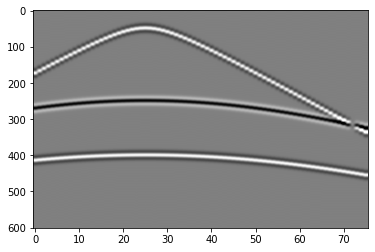

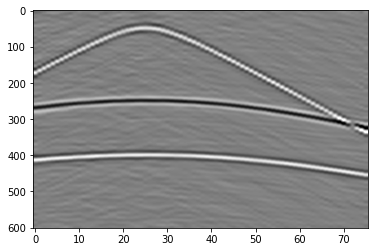

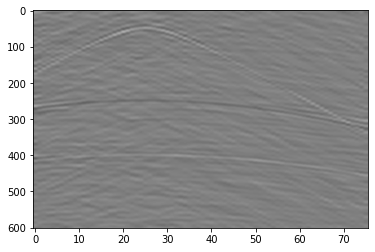

In [4]:
from matplotlib import pyplot as plt
plt.imshow(clean,aspect='auto',cmap='gray', vmin=-1, vmax=1 )
plt.figure()
plt.imshow(outB,aspect='auto',cmap='gray', vmin=-1, vmax=1 )
plt.figure()
plt.imshow(clean-outB,aspect='auto',cmap='gray', vmin=-1, vmax=1 )